# **Customer Segmentation: K-Means Clustering**

## 1. Importing Libraries and Loading data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np

online = pd.read_csv('online_retail.csv')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


**Shape of the dataset**

In [5]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


**Changing datatype of InvoiceDate**

In [6]:
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'], errors='coerce')

In [7]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


## 2. Cohort Analysis
**Assign acquisition month cohort**

In [8]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [9]:
import datetime as dt
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = online.groupby('CustomerID')['InvoiceMonth'].transform('min')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2011-06-01,2010-12-01
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,2011-05-01,2010-12-01
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2011-04-01,2010-12-01
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2011-11-01,2010-12-01
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,2011-03-01,2011-01-01


### **Calculate time offset**
Calculating time offset for each transaction allows you to report the metrics for each cohort in a comparable fashion.

**Define function to extract `year`, `month`, and `day`**

In [10]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

**Assign time offset value**

In [11]:
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom,2011-06-01,2010-12-01,7.0
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom,2011-05-01,2010-12-01,6.0
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom,2011-04-01,2010-12-01,5.0
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom,2011-11-01,2010-12-01,12.0
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom,2011-03-01,2011-01-01,3.0


In [12]:
online.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceMonth,datetime64[ns]
CohortMonth,datetime64[ns]


### **Count monthly active customers from each cohort**

In [13]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'CohortMonth',
                                   columns = 'CohortIndex',
                                   values = 'CustomerID')
print(cohort_counts)

CohortIndex   1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   \
CohortMonth                                                                  
2010-12-01   812.0  289.0  249.0  289.0  270.0  313.0  281.0  274.0  274.0   
2011-01-01   410.0   84.0  109.0   93.0  127.0  112.0  101.0   90.0  121.0   
2011-02-01   352.0   68.0   65.0  101.0   86.0   84.0   85.0   88.0   89.0   
2011-03-01   417.0   68.0  101.0   79.0   86.0   76.0  105.0  100.0  110.0   
2011-04-01   289.0   63.0   58.0   53.0   51.0   63.0   61.0   69.0   18.0   
2011-05-01   256.0   47.0   44.0   37.0   54.0   58.0   65.0   26.0    NaN   
2011-06-01   239.0   40.0   35.0   56.0   55.0   79.0   26.0    NaN    NaN   
2011-07-01   181.0   31.0   35.0   40.0   42.0   18.0    NaN    NaN    NaN   
2011-08-01   155.0   26.0   36.0   34.0   17.0    NaN    NaN    NaN    NaN   
2011-09-01   296.0   67.0   89.0   36.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   349.0   77.0   36.0    NaN    NaN    NaN    NaN    

## 3. Cohort Metrics

### Customer Retention: A very useful metric to understand how many of all the customers are still active.
- How many customers originally in each cohort?
- How many of them were active in following months?

In [14]:
cohort_counts

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,812.0,289.0,249.0,289.0,270.0,313.0,281.0,274.0,274.0,308.0,298.0,391.0,208.0
2011-01-01,410.0,84.0,109.0,93.0,127.0,112.0,101.0,90.0,121.0,131.0,152.0,54.0,NaN
2011-02-01,352.0,68.0,65.0,101.0,86.0,84.0,85.0,88.0,89.0,112.0,25.0,NaN,NaN
2011-03-01,417.0,68.0,101.0,79.0,86.0,76.0,105.0,100.0,110.0,35.0,NaN,NaN,NaN
2011-04-01,289.0,63.0,58.0,53.0,51.0,63.0,61.0,69.0,18.0,NaN,NaN,NaN,NaN
2011-05-01,256.0,47.0,44.0,37.0,54.0,58.0,65.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,239.0,40.0,35.0,56.0,55.0,79.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,181.0,31.0,35.0,40.0,42.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,155.0,26.0,36.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention measures how many customers from each of the cohorts have returned in the subsequent months (retention rate).

You will see the first month's retention - by definition - will be 100% for all cohorts. This is because the number of active customers in the first month is actually the size of the cohort.

Retention gives you the percentage of active customers compared to the total number of customers.

**Calculate Retention Rate**

In [15]:
# Store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

In [16]:
cohort_sizes

,1.0
CohortMonth,
2010-12-01,812.0
2011-01-01,410.0
2011-02-01,352.0
2011-03-01,417.0
2011-04-01,289.0
2011-05-01,256.0
2011-06-01,239.0
2011-07-01,181.0
2011-08-01,155.0


In [17]:
# Divide all the values in cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

In [18]:
retention

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.355911,0.306650,0.355911,0.332512,0.385468,0.346059,0.337438,0.337438,0.379310,0.366995,0.481527,0.256158
2011-01-01,1.0,0.204878,0.265854,0.226829,0.309756,0.273171,0.246341,0.219512,0.295122,0.319512,0.370732,0.131707,NaN
2011-02-01,1.0,0.193182,0.184659,0.286932,0.244318,0.238636,0.241477,0.250000,0.252841,0.318182,0.071023,NaN,NaN
2011-03-01,1.0,0.163070,0.242206,0.189448,0.206235,0.182254,0.251799,0.239808,0.263789,0.083933,NaN,NaN,NaN
2011-04-01,1.0,0.217993,0.200692,0.183391,0.176471,0.217993,0.211073,0.238754,0.062284,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.183594,0.171875,0.144531,0.210938,0.226562,0.253906,0.101562,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.167364,0.146444,0.234310,0.230126,0.330544,0.108787,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.171271,0.193370,0.220994,0.232044,0.099448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.167742,0.232258,0.219355,0.109677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
retention.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,35.6,30.7,35.6,33.3,38.5,34.6,33.7,33.7,37.9,36.7,48.2,25.6
2011-01-01,100.0,20.5,26.6,22.7,31.0,27.3,24.6,22.0,29.5,32.0,37.1,13.2,NaN
2011-02-01,100.0,19.3,18.5,28.7,24.4,23.9,24.1,25.0,25.3,31.8,7.1,NaN,NaN
2011-03-01,100.0,16.3,24.2,18.9,20.6,18.2,25.2,24.0,26.4,8.4,NaN,NaN,NaN
2011-04-01,100.0,21.8,20.1,18.3,17.6,21.8,21.1,23.9,6.2,NaN,NaN,NaN,NaN
2011-05-01,100.0,18.4,17.2,14.5,21.1,22.7,25.4,10.2,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,16.7,14.6,23.4,23.0,33.1,10.9,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,17.1,19.3,22.1,23.2,9.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,16.8,23.2,21.9,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Why NaNs? Because as the more recent cohorts had less time to be active.**

## 4. Visualizing Cohort Analysis

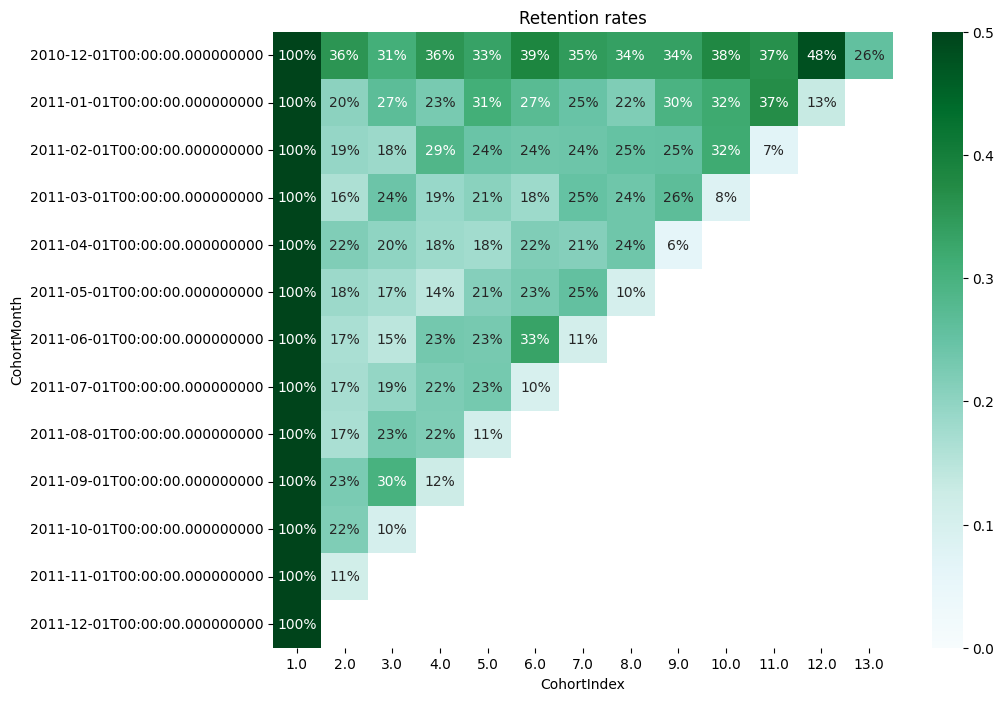

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data = retention,
            annot = True,
            fmt = '.0%',
            vmin = 0.0,
            vmax = 0.5,
            cmap = 'BuGn')

plt.show()

The heatmap shows retention trends for different customer cohorts and provides a clear way to identify strong or weak retention periods over time.

Key insights you can infer from the heatmap:

**1. Customer Retention Over Time:** The retention rate generally decreases as time (cohort index) progresses, which is common as customers tend to drop off after initial engagement. Darker green shades indicate higher retention, while lighter shades suggest a lower retention rate.

**2. Best Performing Cohorts:** Certain months (e.g., 2010-12, 2011-09) have higher retention rates over time compared to others. These cohorts could represent times when marketing efforts, product offerings, or seasonality led to better customer retention.




## 5. Calculate RFM metrics

- Recency - days since last customer transaction
- Frequency - number of transactions in the last 12 months
- Monetary Value - total spend in the last 12 months

In [21]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [22]:
print('Min:{}; Max:{}'.format(min(online.InvoiceDate),
                              max(online.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [23]:
#create a hypothetical snapshot_day data as if we're doing analysis recently.
snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [24]:
# Aggregate data on a customer level
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate':lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

# Rename columns for easier interpretation
datamart.rename(columns = {'InvoiceDate':'Recency',
                           'InvoiceNo':'Frequency',
                           'TotalSum': 'MonetaryValue'}, inplace=True)

datamart.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,31,656.78
12348.0,319,5,443.52
12349.0,19,16,598.01
12350.0,310,2,42.90


## 6. Building RFM Segments

Calculating quartile value for each column and name them as R, F, M.

In [25]:
# Recency quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
datamart = datamart.assign(R = r_quartiles.values)

In [26]:
datamart.head()

,Recency,Frequency,MonetaryValue,R
CustomerID,,,,
12346.0,326,1,77183.60,1
12347.0,2,31,656.78,4
12348.0,319,5,443.52,1
12349.0,19,16,598.01,3
12350.0,310,2,42.90,1


In [27]:
# Frequency and monetary quartiles
f_labels = range(1, 5)
m_labels = range(1, 5)
f_quartiles = pd.qcut(datamart['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)
datamart = datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

In [28]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,31,656.78,4,4,4
12348.0,319,5,443.52,1,2,4
12349.0,19,16,598.01,3,3,4
12350.0,310,2,42.90,1,1,1


### **Build RFM segment and RFM score**

In [29]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R', 'F','M']].sum(axis=1)
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,2,31,656.78,4,4,4,4.04.04.0,12
12348.0,319,5,443.52,1,2,4,1.02.04.0,7
12349.0,19,16,598.01,3,3,4,3.03.04.0,10
12350.0,310,2,42.90,1,1,1,1.01.01.0,3


In [30]:
datamart.dtypes

,0
Recency,int64
Frequency,int64
MonetaryValue,float64
R,category
F,category
M,category
RFM_Segment,object
RFM_Score,int64


In [31]:
# Modify the function to ensure R, F, and M are integers
def join_rfm(x):
    return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))

# Apply the function to create the RFM_Segment
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)

# Calculate the RFM score as before
datamart['RFM_Score'] = datamart[['R', 'F', 'M']].sum(axis=1)

datamart.head()


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,31,656.78,4,4,4,444,12
12348.0,319,5,443.52,1,2,4,124,7
12349.0,19,16,598.01,3,3,4,334,10
12350.0,310,2,42.90,1,1,1,111,3


## 7. Analyzing RFM segments
**Largest RFM segments**

In [32]:
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

,0
RFM_Segment,
444,412
111,388
344,204
211,202
333,155
112,145
233,144
222,142
433,137


**Calculate average recency, frequency, and monetary value, and then count of customers in each group.**

In [33]:
# Summary metrics per RFM score
datamart.groupby('RFM_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           261.9       2.1          21.7   388
4           175.0       3.1          39.5   408
5           144.3       4.5          75.3   439
6           107.7       6.4         -62.1   445
7            84.7       9.0         160.7   447
8            64.5      12.6         207.1   427
9            48.6      17.3         296.1   386
10           33.6      25.1         427.8   397
11           21.3      39.8         838.8   370
12            7.3      81.7        1916.2   412

**General Observations:**

- Recency decreases as the RFM score increases**: Customers with higher RFM scores (e.g., 12) have made more recent purchases (lower Recency), while those with lower scores (e.g., 3) haven't made purchases in a while (higher Recency values).

- Frequency increases with RFM score**: Customers with higher scores (e.g., 12) tend to make significantly more purchases than those with lower scores. For example, customers with an RFM score of 3 made an average of 2.1 purchases, while those with a score of 12 made an average of 81.7 purchases.

- Monetary Value generally increases with the RFM score**: Customers with higher scores spend significantly more. Customers with an RFM score of 12 have spent an average of 1,916.2, while those with a score of 3 spent only 21.7 on average.

**Key Insights:**
1. High-Value Customers (RFM score 12):

- These customers make frequent purchases (81.7 on average) and have a low Recency score (they’ve purchased very recently).
- They also generate a significant amount of revenue (1,916.2), making them the most valuable segment.
- This group is highly engaged and should be prioritized for retention and reward programs.


2. Engaged Customers (RFM scores 10 and 11):

- These customers also have a low Recency score (21.3–33.6), meaning they purchase regularly.
- They have high Frequency (25.1–39.8 purchases on average) and spend a lot (427.8–838.8).
- These customers are loyal and valuable, and businesses should continue efforts to keep them engaged.

3. At-Risk Customers (RFM scores 6 and 7):

- These customers have moderate Recency scores (107.7–84.7), meaning it’s been a while since their last purchase.
- They still have moderate to high Frequency (6.4–9.0 purchases on average), indicating they are repeat customers.
- Interestingly, the Monetary Value for score 6 is negative (-62.1), which could be due to returns or discounts, while score 7 customers have a positive value (160.7).
- This segment might be at risk of churn, especially if their recency continues to increase. They could benefit from re-engagement campaigns or incentives.

4. Low-Value or Inactive Customers (RFM scores 3 to 5):

- These customers have high Recency scores (144.3–261.9), indicating they haven't made recent purchases.
- They make very few purchases (2.1–4.5 on average) and spend significantly less (21.7–75.3).
- These customers are either new or inactive and may require targeted marketing to increase engagement, such as special offers or discounts.

In [34]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,31,656.78,4,4,4,444,12
12348.0,319,5,443.52,1,2,4,124,7
12349.0,19,16,598.01,3,3,4,334,10
12350.0,310,2,42.90,1,1,1,111,3


## 8. Using RFM score to group customers into GOLD, SILVER, and BRONZE segments

In [35]:
def segment_me(df):
  if df['RFM_Score'] >= 9:
    return 'Gold'
  elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
    return 'Silver'
  else:
    return 'Bronze'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)

In [36]:
datamart.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Silver
12347.0,2,31,656.78,4,4,4,444,12,Gold
12348.0,319,5,443.52,1,2,4,124,7,Silver
12349.0,19,16,598.01,3,3,4,334,10,Gold
12350.0,310,2,42.90,1,1,1,111,3,Bronze


In [37]:
datamart.groupby('General_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)


Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            217.3       2.6          30.9   796
Gold               27.5      41.5         884.3  1565
Silver            100.5       8.1          94.3  1758

**Key Insights:**

1. Gold Segment:

- These are highly engaged, loyal customers who make frequent and recent purchases, contributing significantly to revenue.
- The fact that they have a very low Recency score (27.5) shows that they are actively buying.
- Retention should be a top priority for this group, as losing these customers could have a substantial impact on revenue. Loyalty programs, exclusive offers, and personalized experiences are strategies that could further strengthen their engagement.

2. Silver Segment:

- This group makes occasional purchases and generates moderate revenue. They represent the middle tier of customers and have potential for growth.
- Moderate Recency (100.5) indicates they have not purchased very recently, but they are still active buyers.
- Focus on re-engagement strategies such as targeted promotions or upselling could move them into the Gold tier, enhancing their lifetime value.

3. Bronze Segment:

- These are low-value or inactive customers who haven’t purchased recently and make infrequent purchases. They contribute the least in terms of revenue.
- With a high Recency score (217.3), they are at risk of being lost entirely unless reactivated.
- This group would benefit from reactivation campaigns like win-back offers, discounts, or targeted marketing aimed at re-engaging them.

**Strategic Implications:**

- Gold Segment (41.5 average transactions, $884.3 spend) represents the core of the business’s revenue and should be prioritized for retention and engagement strategies. This segment contributes the most financially and is highly engaged with the brand.

- Silver Segment (8.1 average transactions, $94.3 spend) presents growth potential. Efforts to increase their purchase frequency and spending could potentially upgrade them to the Gold tier. They are a large group, so improving their engagement can have a significant cumulative effect on revenue.

- Bronze Segment (2.6 average transactions, $30.9 spend) represents at-risk or low-engagement customers. These customers require a different strategy, focusing on re-engagement and trying to bring them back into regular purchasing habits.

**What is the average MonetaryValue for the segment with RFM_Score of 9 (nine)?**

In [38]:
# Filter the data where RFM_Score is equal to 9
rfm_score_9 = datamart[datamart['RFM_Score'] == 9]

# Calculate the mean MonetaryValue for this segment
mean_monetary_value_9 = rfm_score_9['MonetaryValue'].mean()

print(mean_monetary_value_9)


296.1128005181347


## 9. Exploring distribution of recency, frequency, and Monetary Value

<Axes: xlabel='Recency', ylabel='Density'>

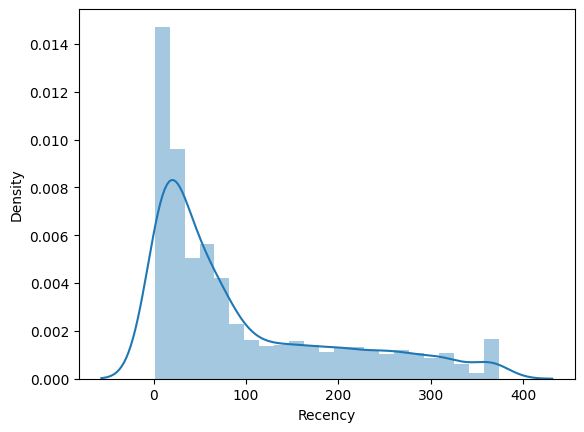

In [39]:
sns.distplot(datamart['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

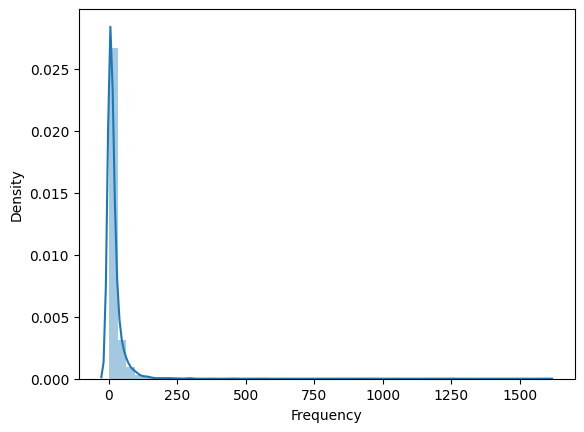

In [40]:
sns.distplot(datamart['Frequency'])

<Axes: xlabel='MonetaryValue', ylabel='Density'>

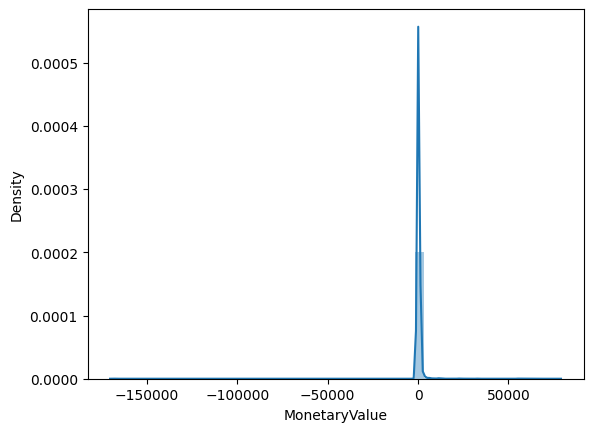

In [41]:
sns.distplot(datamart['MonetaryValue'])

In [42]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4119.000000,4119.000000,4119.000000,4119.000000
mean,95.347172,19.727847,382.186980,7.444525
std,101.632153,48.372984,3379.753038,2.832163
min,1.000000,1.000000,-168466.700000,3.000000
25%,18.000000,4.000000,56.740000,5.000000
50%,53.000000,9.000000,139.850000,7.000000
75%,151.000000,21.000000,345.410000,10.000000
max,374.000000,1590.000000,77183.600000,12.000000


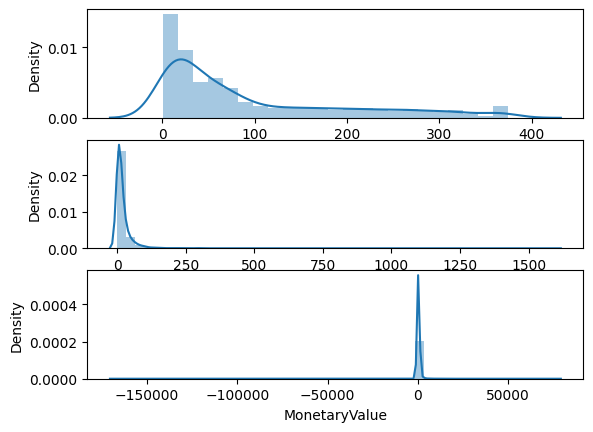

In [43]:
# Plot distribution of recency
plt.subplot(3, 1, 1); sns.distplot(datamart['Recency'])

# Plot distribution of frequency
plt.subplot(3, 1, 2); sns.distplot(datamart['Frequency'])

# Plot distribution of MonetaryValue
plt.subplot(3, 1, 3); sns.distplot(datamart['MonetaryValue'])

# Show the plot
plt.show()

All these are highly skewed.

## 10. Unskewning the variables

- logarithmic transformation
- cube root transformation (handles negative values)

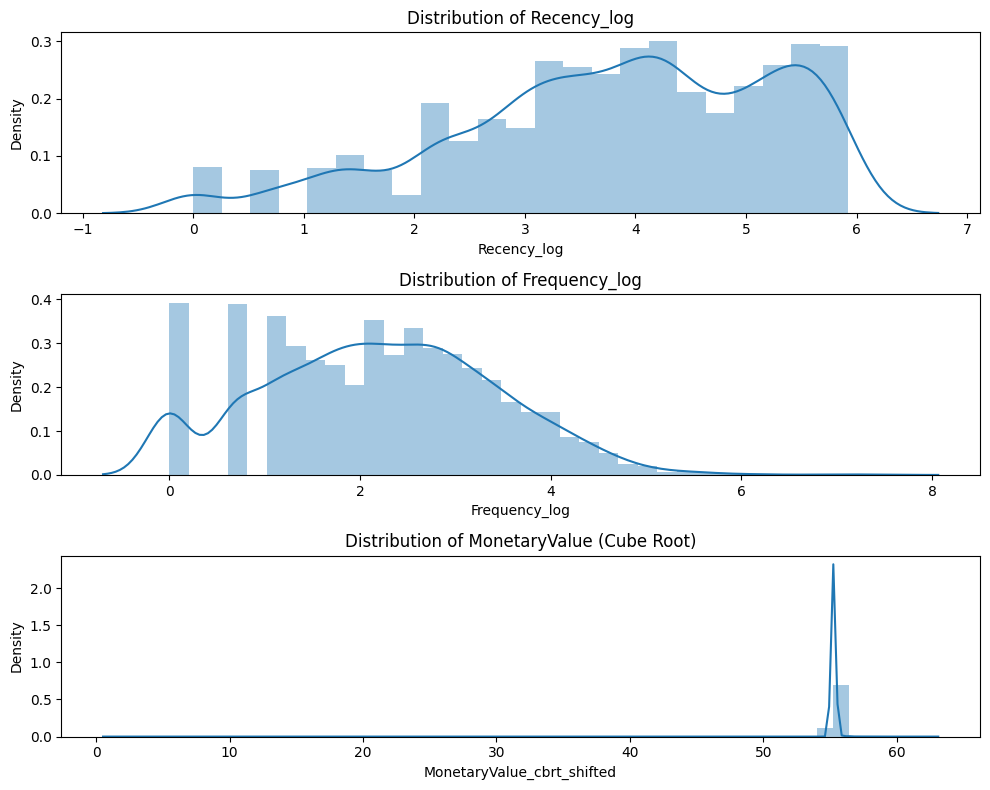

In [44]:
# Apply log transformation to Recency
datamart['Recency_log'] = np.log(datamart['Recency'])

# Apply log transformation to Frequency
datamart['Frequency_log'] = np.log(datamart['Frequency'])

# Shift MonetaryValue by adding the absolute value of the minimum negative value + 1 (to avoid zero)
shift_value = abs(datamart['MonetaryValue'].min()) + 1
datamart['MonetaryValue_shifted'] = datamart['MonetaryValue'] + shift_value

# Apply cube root transformation to the shifted values (handles negative values)
datamart['MonetaryValue_cbrt_shifted'] = np.cbrt(datamart['MonetaryValue_shifted'])

# Create a figure with 3 subplots (3 rows, 1 column)
plt.figure(figsize=(10, 8))

# Create a subplot of the distribution of Recency_log
plt.subplot(3, 1, 1)
sns.distplot(datamart['Recency_log'])
plt.title('Distribution of Recency_log')

# Create a subplot of the distribution of Frequency_log
plt.subplot(3, 1, 2)
sns.distplot(datamart['Frequency_log'])
plt.title('Distribution of Frequency_log')

# Create a subplot of the distribution of Monetary_log
plt.subplot(3, 1, 3)
sns.distplot(datamart['MonetaryValue_cbrt_shifted'])
plt.title('Distribution of MonetaryValue (Cube Root)')

# Show the plot
plt.tight_layout()
plt.show()


In [45]:
datamart.describe()

,Recency,Frequency,MonetaryValue,RFM_Score,Recency_log,Frequency_log,MonetaryValue_shifted,MonetaryValue_cbrt_shifted
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,95.347172,19.727847,382.186980,7.444525,3.802187,2.203399,168849.886980,55.261828
std,101.632153,48.372984,3379.753038,2.832163,1.435547,1.222649,3379.753038,0.872042
min,1.000000,1.000000,-168466.700000,3.000000,0.000000,0.000000,1.000000,1.000000
25%,18.000000,4.000000,56.740000,5.000000,2.890372,1.386294,168524.440000,55.235840
50%,53.000000,9.000000,139.850000,7.000000,3.970292,2.197225,168607.550000,55.244919
75%,151.000000,21.000000,345.410000,10.000000,5.017280,3.044522,168813.110000,55.267360
max,374.000000,1590.000000,77183.600000,12.000000,5.924256,7.371489,245651.300000,62.628646


Finally, we have removed negative values from MonetaryValue Variable by shifting the entire MonetaryValue distribution to make all values positive before applying transformations. It is done by adding a constant to the entire column, ensuring that the smallest value becomes positive. After shifting, cube root transformation is applied.

## 11. Centering and scaling variables

In [93]:
datamart_rfm = datamart[['Recency_log', 'Frequency_log', 'MonetaryValue_cbrt_shifted']].rename(columns={
    'Recency_log': 'Recency',
    'Frequency_log': 'Frequency',
    'MonetaryValue_cbrt_shifted': 'MonetaryValue'
})
datamart_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.786897,0.000000,62.628646
12347.0,0.693147,3.433987,55.301319
12348.0,5.765191,1.609438,55.278065
12349.0,2.944439,2.772589,55.294913
12350.0,5.736572,0.693147,55.234328


In [94]:
datamart_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4119.000000,4119.000000,4119.000000
mean,3.802187,2.203399,55.261828
std,1.435547,1.222649,0.872042
min,0.000000,0.000000,1.000000
25%,2.890372,1.386294,55.235840
50%,3.970292,2.197225,55.244919
75%,5.017280,3.044522,55.267360
max,5.924256,7.371489,62.628646


In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [ 0.  0. -0.]
std:  [1. 1. 1.]


In [96]:
datamart_normalized_df = pd.DataFrame(data=datamart_normalized,
                                      index=datamart_rfm.index,
                                      columns=datamart_rfm.columns)
datamart_normalized_df.agg(['mean','std']).round()

,Recency,Frequency,MonetaryValue
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0


In [97]:
datamart_normalized_df.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,1.382715,-1.802371,8.448802
12347.0,-2.166016,1.006615,0.045291
12348.0,1.367592,-0.485858,0.018621
12349.0,-0.597579,0.465594,0.037944
12350.0,1.347654,-1.235380,-0.031539


In [98]:
datamart_normalized

array([[ 1.38271454, -1.80237103,  8.44880202],
       [-2.16601644,  1.0066155 ,  0.04529094],
       [ 1.36759214, -0.48585785,  0.01862143],
       ...,
       [ 0.72043656, -1.80237103, -0.03522363],
       [-1.68311234,  2.33361594,  0.01892044],
       [ 0.19183193,  0.23027175, -0.0100014 ]])

## 12. Model Building: K-means Clustering

K-Means is an unsupervised machine learning algorithm used for clustering data into K distinct groups. The algorithm assigns each data point to one of the K clusters based on minimizing the Euclidean distance between the data point and the centroid of the cluster.

In [99]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [100]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

### Analyzing average RFM values of each cluster

In [101]:
# Create a cluster label column in the original DataFrame
datamart_rfm_k2 = datamart_rfm.assign(Cluster = cluster_labels)
datamart_rfm_k2

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,5.786897,0.000000,62.628646,0
12347.0,0.693147,3.433987,55.301319,0
12348.0,5.765191,1.609438,55.278065,0
12349.0,2.944439,2.772589,55.294913,0
12350.0,5.736572,0.693147,55.234328,0
...,...,...,...,...
18278.0,4.304065,0.693147,55.234743,0
18281.0,5.198497,0.693147,55.232043,0
18282.0,4.836282,0.000000,55.231116,0


In [102]:
# Calculate average RFM values and size for each cluster
datamart_rfm_k2.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue': ['mean','count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           4.0       2.0          55.0  4118
1           0.0       1.0           1.0     1

This is a result of simple 2-cluster solution. I just picked a random number of clusters here. Let's figure out the appropriate number of clusters.

### 12.1 Choosing appropriate number of clusters

### Elbow criterion method:- The Elbow Method is a technique used to determine the optimal number of clusters (K) for K-Means clustering.

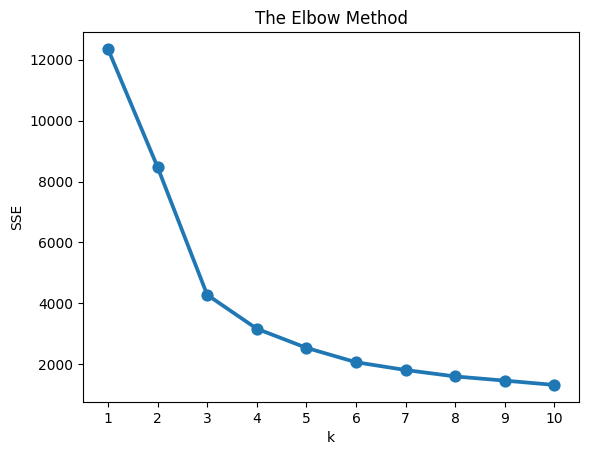

In [103]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Fit KMeans and calculate SSE for each *K*
sse = {}
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(datamart_normalized)
  sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

# Plot SSE for each *K*
plt.title('The Elbow Method')
plt.xlabel('k');plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

I would select k=3 or k=4, but not sure which one is better. So, in order to decide I will use Silhouette Score. It is metric used to evaluate the quality of clusters in a cluster algorithm. It helps measure how well separated and cohesive the clusters are by comparing the distance of each data point to its own cluster centroid and other cluster's centroid.

### Silhouette Score Method

In [127]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for K=3
kmeans_3 = KMeans(n_clusters=3, random_state=42).fit(datamart_normalized)
silhouette_3 = silhouette_score(datamart_normalized, kmeans_3.labels_)

# Calculate silhouette score for K=4
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(datamart_normalized)
silhouette_4 = silhouette_score(datamart_normalized, kmeans_4.labels_)

print(f'Silhouette Score for K=3: {silhouette_3}')
print(f'Silhouette Score for K=4: {silhouette_4}')

Silhouette Score for K=3: 0.35008433403894595
Silhouette Score for K=4: 0.3517206218719919


Based on the **silhouette scores** we've provided for different values of K:

- **K=3**: 0.35008
- **K=4**: 0.35172

- The silhouette score for **K=4** is slightly higher than **K=3**, but, I will select K=4.



In [128]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(datamart_normalized)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

In [129]:
# Create a cluster label column in the original DataFrame
datamart_rfm_k4 = datamart_rfm.assign(Cluster = cluster_labels)
datamart_rfm_k4

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,5.786897,0.000000,62.628646,2
12347.0,0.693147,3.433987,55.301319,3
12348.0,5.765191,1.609438,55.278065,2
12349.0,2.944439,2.772589,55.294913,0
12350.0,5.736572,0.693147,55.234328,2
...,...,...,...,...
18278.0,4.304065,0.693147,55.234743,2
18281.0,5.198497,0.693147,55.232043,2
18282.0,4.836282,0.000000,55.231116,2


In [130]:
# Calculate average RFM values and size for each cluster
datamart_rfm_k4.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue': ['mean','count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0           4.0       3.0          55.0  1696
1           0.0       1.0           1.0     1
2           5.0       1.0          55.0  1485
3           2.0       3.0          55.0   937

### 12.2 Relative importance of segment attributes
- Useful technique to identify relative importance of each segment's attribute
- Calculate average values of each cluster
- Calculate average values of population
- Calculate importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average)

This concept helps in understanding how each attribute (e.g., Recency, Frequency, and MonetaryValue) contributes to differentiating customer segments (clusters). By calculating the relative importance of each attribute for each cluster, you can identify which attributes are more significant in defining that specific cluster compared to the overall population.

In [131]:
cluster_avg = datamart_rfm_k4.groupby(['Cluster']).mean()
population_avg = datamart_rfm.mean()
relative_imp = cluster_avg / population_avg - 1

In [132]:
relative_imp

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.031395,0.173042,-0.000038
1,-1.000000,-0.501401,-0.981904
2,0.291997,-0.555610,-0.000307
3,-0.518528,0.567880,0.001603


In [133]:
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,0.03,0.17,-0.00
1,-1.00,-0.50,-0.98
2,0.29,-0.56,-0.00
3,-0.52,0.57,0.00


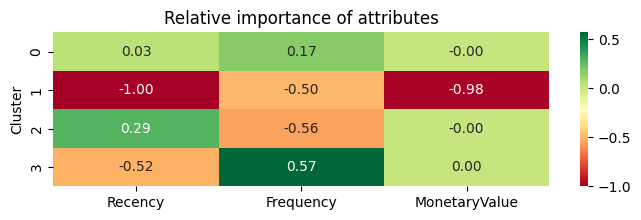

In [119]:
# Plot heatmap
plt.figure(figsize=(8,2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

This heatmap illustrates the **relative importance of attributes** (Recency, Frequency, and Monetary Value) across different customer clusters generated from K-means clustering. Here’s how to interpret the key insights:

1. **Cluster 0**:
   - **Recency** and **Frequency** have low positive values (0.03 and 0.17), indicating that customers in this cluster tend to have recent purchases and a moderate frequency of transactions.
   - **MonetaryValue** is essentially 0, indicating that spending per transaction or total spend is very low.

2. **Cluster 1**:
   - **Recency** has a strong negative value (-1.00), meaning customers in this cluster have made purchases long ago (they are likely lost or inactive).
   - **Frequency** and **MonetaryValue** are also strongly negative (-0.50 and -0.98), indicating these customers purchase infrequently and have very low spend.

3. **Cluster 2**:
   - **Recency** is moderately positive (0.29), suggesting recent activity but not the most recent compared to other clusters.
   - **Frequency** is negative (-0.56), showing that these customers don't buy often.
   - **MonetaryValue** is close to zero, suggesting they may spend very little per transaction.

4. **Cluster 3**:
   - **Recency** is negative (-0.52), indicating that customers haven't purchased recently.
   - **Frequency** has a strong positive value (0.57), indicating that these customers purchase frequently.
   - **MonetaryValue** is essentially 0, meaning they may not be high spenders despite frequent purchases.

### General Insights:
- **Cluster 1** consists of **inactive or lost customers**, as all three attributes have strong negative values.
- **Cluster 3** likely represents **frequent buyers who haven't bought recently**, possibly offering a chance for re-engagement.
- **Cluster 0** and **Cluster 2** show low to moderate importance for all attributes, which might indicate **average customers** with varying levels of engagement and spending patterns.

This segmentation can guide targeted marketing strategies based on customer behavior.

In [ ]:
###############################################End-of-Coding######################################################